In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
from sklearn import datasets
from numpy.linalg import norm

# Problem 1

In this problem we will look at image compression using SVD, following the lines of the well-known "Eigenfaces" experiment. The basic concept is to represent an image (in grayscale) of size $m \times n$ as an $m \times n$ real matrix $M$. SVD is then applied to this matrix to obtain $U$, $S$, and $V$ such that $M = U S V^T$. Here $U$ and $V$ are the matrices whose columns are the left and right singular vectors respectively, and $S$ is a diagonal $m \times n$ matrix consisting of the singular values of $M$. The number of non-zero singular values is the rank of $M$. By using just the largest $k$ singular values (and corresponding left and right singular vectors), one obtains the best rank-$k$ approximation to $M$.

The following code returns the dataset of 400 images.

In [ ]:
#from sklearn.datasets import get_data_home
#print(get_data_home())
# if there is an error in this area, can delete the data downloaded to the get_data_home() folder, and try again
data = datasets.fetch_olivetti_faces(download_if_missing=True)
images = data.images

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(a) Given an $m \times n$ image $M$ and its rank-$k$ approximation $A$, we can measure the reconstruction error using mean $\ell_1$ error: $$ \text{error}_{\ell_1}(M, A) = \frac{1}{mn}\| M - A \|_1 = \frac{1}{mn}\sum_{i=1}^{m}\sum_{j=1}^{n}| M_{i,j} - A_{i,j} |. $$ For $k = 1, \dots, 30$, take the average rank-$k$ reconstruction error over all images in the dataset, and plot a curve of average reconstruction error as a function of $k$.

In [ ]:
# Returns the best rank-k approximation to M
def svd_reconstruct(M, k):
    # passes in full_matrices=False to avoid dimensionality issues
    U, S, V_T = np.linalg.svd(a=M, full_matrices=False)
    U_rank = U[:, :k]  # take k columns of U
    S_rank = np.diag(S[:k])  # get the diagonal vector of S
    V_T_rank = V_T[:k, :]  # take k rows of V_T
    U_S_rank = np.dot(U_rank,S_rank)  # U_rank * S_rank * V_T_rank to get k-rank matrix approximation of M
    A = np.dot(U_S_rank, V_T_rank)  # rank-k approximation A
    return A

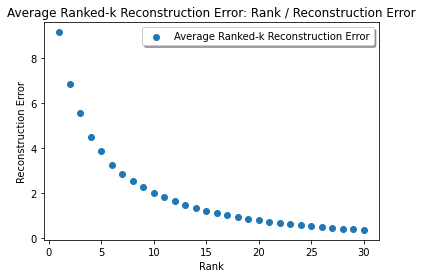

In [ ]:
# loop over rank from 1 to 30 
avg_error_rate = []
ranks = []
for rank_i in range(1, 30 + 1):
  ranks.append(rank_i)
  error_rates = []
  error_rate_sum = 0.0
  for M in images:
    A = svd_reconstruct(M, rank_i)
    error_M_A = norm(M-A, 1)  # level 1 norm error
    error_rates.append(error_M_A)
    error_rate_sum += error_M_A
  avg_error_rate.append(error_rate_sum / len(images))

# plot the Average Ranked-k Reconstruction Error results
plt.scatter(ranks, avg_error_rate, label="Average Ranked-k Reconstruction Error")
plt.title("Average Ranked-k Reconstruction Error: Rank / Reconstruction Error")
plt.xlabel("Rank")
plt.ylabel("Reconstruction Error")
plt.legend(loc="best", shadow=True)
plt.show()


(b) Pick any image in the dataset, and display the following side-by-side as images: the original, and the best rank-$k$ approximations for $k = 10, 20, 30, 40$. You will find the `imshow` method in matplotlib useful for this; pass in `cmap='gray'` to render in grayscale. Feel free to play around further.

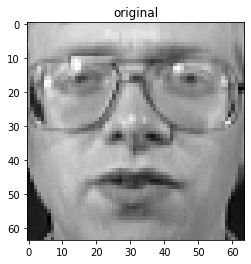

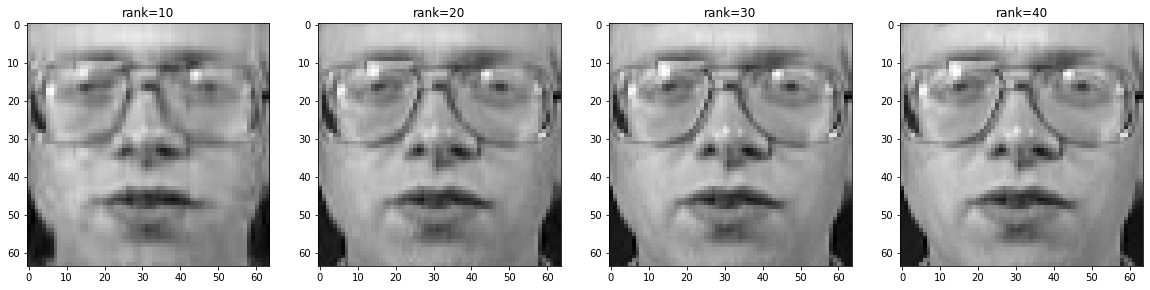

In [ ]:
# show the first original image
selected_image = images[19]
img = plt.imshow(selected_image)
img.set_cmap("gray")
plt.title("original")
plt.show()

ranks = (10, 20, 30, 40)  # sizes tuple
fig, axes = plt.subplots(1, len(ranks), figsize=(20,20))  # create subplots instances to show the sized ranks horizontally

# iterate over all the sized ranks for inspection
for rank, ax in zip(ranks, axes.ravel()):
  ranked_image = svd_reconstruct(selected_image, rank)
  img_displayed = ax.imshow(ranked_image)
  img_displayed.set_cmap("gray")
  ax.set_title('rank=' + str(rank))

plt.show()

# Problem 2

In this problem we visualize the Wisconsin breast cancer dataset in two dimensions using PCA. First, rescale the data so that every feature has mean 0 and standard deviation 1 across the various points in the dataset. You may find `sklearn.preprocessing.StandardScaler` useful for this. Next, compute the top two principal components of the dataset using PCA, and for every data point, compute its coordinates (i.e. projections) along these two principal components. You should do this in two ways:
1. By using SVD directly. Do not use any PCA built-ins.
2. By using `sklearn.decomposition.PCA`.

The two approaches should give exactly the same result, and this also acts as a check. (But note that the signs of the singular vectors may be flipped in the two approaches since singular vectors are only determined uniquely up to sign. If this happens, flip signs to make everything identical again.)

Your final goal is to make a scatterplot of the dataset in 2 dimensions, where the x-axis is the first principal component and the y-axis is the second. Color the points by their diagnosis (malignant or benign). Do this for both approaches. Your plots should be identical. Does the data look roughly separable already in 2 dimensions?

ANSWER - Yes, as can be seen in the plots below both plots were identical. Also from the data plots it can be seen that the data does look separable in 2 dimensions meaning 2 components are enough to explain the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy.linalg import svd 

# cancer = datasets.load_breast_cancer()
X, y = datasets.load_breast_cancer(return_X_y = True)


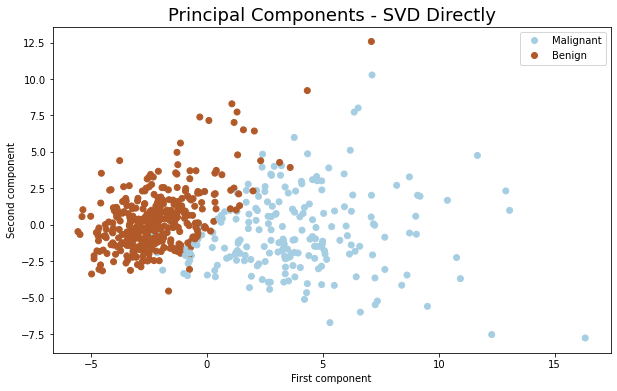

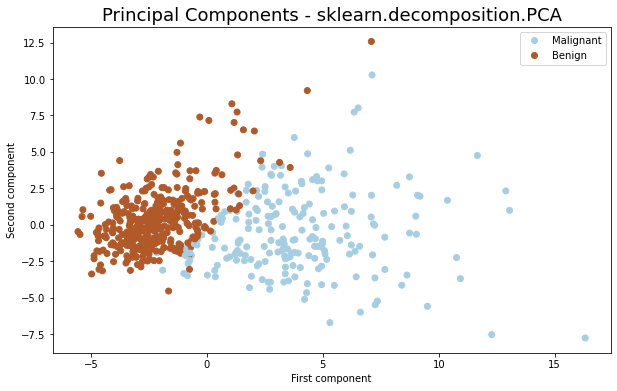

In [ ]:
from numpy.linalg import svd 

# number of dimensions / components
num_components = 2
classes = ['Malignant', 'Benign']

# preprocessing
scaler = StandardScaler()
cancer_scaled = scaler.fit_transform(X)

# 1 use SVD directly
def performPCAUsingSVD(M):
    U, S, V = np.linalg.svd(M,full_matrices=False)

    # get principal components using U and S from the linalg.SVD function
    principal_components = np.matrix(U[:, :num_components]) * np.diag(S[:num_components])
        
    component_1 = principal_components[:, 0]
    component_2 = principal_components[:, 1]
    
    resize_shape = (component_1.shape[0],)
    component_1_vec = np.resize(component_1, resize_shape)
    component_2_vec = np.resize(component_2, resize_shape)
    
    # flip the signage
    component_1_vec = component_1_vec * -1
    component_2_vec = component_2_vec * -1

    # plot the 1st and 2nd component as scatter plot
    plt.figure(figsize=(10,6))
    plt.title("Principal Components - SVD Directly", fontsize=18)

    scatter = plt.scatter(component_1_vec, component_2_vec, c=y, cmap='Paired')

    plt.xlabel("First component")
    plt.ylabel("Second component")

    plt.legend(handles=scatter.legend_elements()[0], labels=classes)
    
# 2 use sklearn.decomposition.PCA
def performSklearnPCA(cancer_scaled):
    pca = PCA(n_components=2)
    pca.fit(cancer_scaled)
    pcaX_transformed = pca.transform(cancer_scaled)

    # plot the 1st and 2nd component as scatter plot
    plt.figure(figsize=(10,6))
    plt.title("Principal Components - sklearn.decomposition.PCA", fontsize=18)
    
    component_1 = pcaX_transformed[:,0]
    component_2 = pcaX_transformed[:,1]
    
    scatter = plt.scatter(component_1, component_2, c=y, cmap='Paired')

    plt.xlabel("First component")
    plt.ylabel("Second component")

    plt.legend(handles=scatter.legend_elements()[0], labels=classes)

# first performs PCA using SVD directly and plots scatter plot of the 1st and 2nd principal component
performPCAUsingSVD(cancer_scaled)

# second performs PCA using sklearn PCA and plots scatter plot of the 1st and 2nd principal component
performSklearnPCA(cancer_scaled)
    